In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
import timeit
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
#matplotlib.rcParams['figure.dpi'] = 75

# sns.set(rc={"figure.dpi":330, 'savefig.dpi':330})
sns.set_context("notebook")
sns.set_style("whitegrid")
# plt.rcParams['figure.figsize'] = [3.0, 3.0]
# plt.rcParams['figure.dpi'] = 330

In [4]:
TOL = 1e-6
MAX_ITER = 1e4

**Plan for article**:
1. Define each method (4 methods?), citing graphical derivations and toy examples (use 1 function)
2. Comparisons with efficiency (time), rate of convergence (steps taken to converge), deltas (differences in iterations)
3. Drawbacks/evaluations

# 1. Methods and their graphical derivations

In [5]:
# defining shared function
# sin(x)-2x^3+3x^2+x+1
func = lambda x : np.sin(x) - 2*(x**3) + 3*(x**2) + x + 1
func_prime = lambda x : np.cos(x) - 6*(x**2) + 6*x + 1

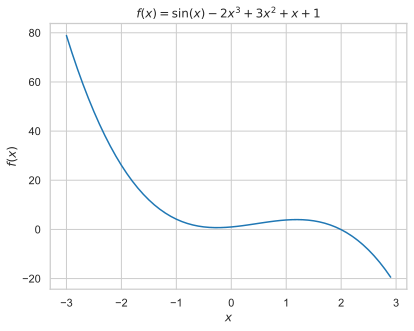

In [6]:
x_vals = np.arange(-3,3,.1)
plt.plot(x_vals, func(x_vals))
plt.title(r'$f(x)=\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

## Bisection Method

In [7]:
def bisection(f_func, interval, tol=1e-9, max_iter=1e4, noisy=False, verbose=False):
    a, b = interval
    counter = 0
    assert f_func(a) != f_func(b), "Function evaluates to same value at (a) and (b)"
    max_iter = int(max_iter)
    
    for i in range(max_iter):
        mid_point = (a+b)/2
        if verbose: print(mid_point)
        if abs(b-a) < tol or abs(f_func(mid_point)) < tol:
            if noisy:
                return mid_point, counter
            return mid_point # if reached below tolerance
        
        # reassigning interval start/end
        if np.sign(f_func(mid_point)) == np.sign(f_func(a)):
            a = mid_point
        else:
            b = mid_point
        
        counter += 1
    
    raise ValueError("No convergence")

In [8]:
bisection(func, (1.5, 2.5))

1.9920019968412817

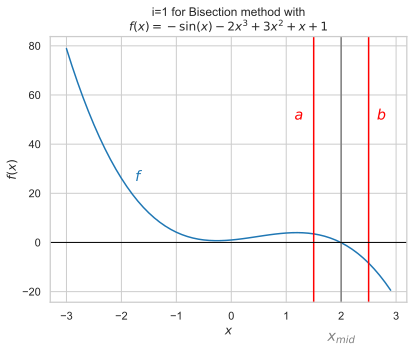

In [9]:
x_vals = np.arange(-3,3,.1)
plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.axvline(1.5, c='red')
plt.text(1.15,50,r'$a$',color='red',fontsize='large')

plt.axvline(2.5, c='red')
plt.text(2.65,50,r'$b$',color='red',fontsize='large')

plt.axvline((1.5+2.5)/2, c='grey')
plt.text(1.75,-40,r'$x_{mid}$',color='grey',fontsize='large')

plt.axhline(0, color='black', linewidth=1)

plt.title(r'i=1'+f' for Bisection method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

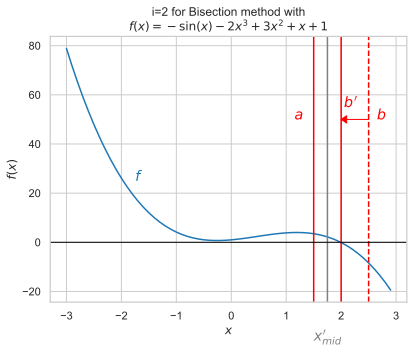

In [10]:
x_vals = np.arange(-3,3,.1)
plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.axvline(1.5, c='red')
plt.text(1.15,50,r'$a$',color='red',fontsize='large')

plt.axvline(2.5, c='red', linestyle='dashed')
plt.text(2.65,50,r'$b$',color='red',fontsize='large')
plt.arrow(2.5,50,-.5,0,color='red', length_includes_head=True, head_width=3, head_length=.1)
plt.axvline(2, c='red')
plt.text(2.05,55,r'$b^\prime$',color='red',fontsize='large')

plt.axvline(1.75,c='grey')
plt.text(1.5,-40,r'$x_{mid}^\prime$',color='grey',fontsize='large')

plt.axhline(0, color='black', linewidth=1)

plt.title(r'i=2'+f' for Bisection method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

## Newton's Method

In [11]:
def newton(a_func_arr, x_0, tol=1e-9, max_iter=1e4, noisy=False):
    a_func, a_func_d = a_func_arr
    max_iter = int(max_iter)
    x_prev = x_0
    counter = 0
    
    for i in range(max_iter):
        f_last = a_func(x_prev)
        assert a_func_d(x_prev) != 0, "Derivative evaluates to zero"
        fp_last = a_func_d(x_prev) # getting f(x) and f'(x)
        x_cur = x_prev - (f_last/fp_last)
        
        # checking tolerance
        if abs(x_cur - x_prev) < tol or abs(f_last) < tol:
            if noisy:
                return (x_cur, counter)
            return x_cur
        
        x_prev = x_cur # reassigning previous x_i
        counter += 1
    
    raise ValueError("No convergence")

In [12]:
newton((func, func_prime), 2)

1.9920019966374949

In [13]:
func_prime(-2)

-35.41614683654714

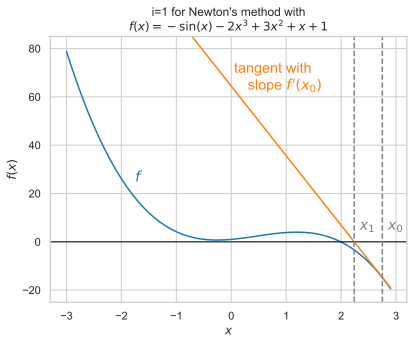

In [14]:
x_vals = np.arange(-3,3,.1)

#y=mx+c
xz = 2.75
xp = func_prime(xz)*x_vals - xz*func_prime(xz) + func(xz)
xpf = lambda x : func_prime(xz)*x - xz*func_prime(xz) + func(xz)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
plt.text(.05,xpf(.05)+7,r'tangent with',fontsize='large', color='tab:orange')
plt.text(.3,xpf(.05), r'slope $f^\prime(x_0)$',fontsize='large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz, color='grey', linestyle='dashed')
plt.text(xz+.1,5,r'$x_0$',fontsize='large',color='grey')

x1=(xz*func_prime(xz)-func(xz))/func_prime(xz)
plt.axvline(x1,color='grey',linestyle='dashed')
plt.text(x1+.1,5,r'$x_1$',fontsize='large',color='grey')

plt.ylim(-25, 85)

plt.title(r'i=1'+f' for Newton\'s method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

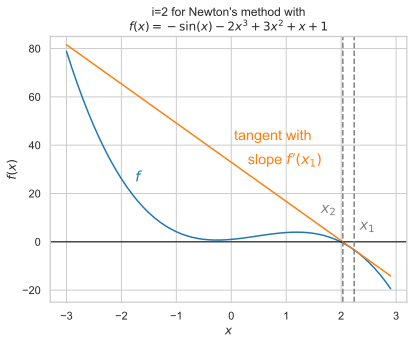

In [15]:
x_vals = np.arange(-3,3,.1)

#y=mx+c
xz = x1
xp = func_prime(xz)*x_vals - xz*func_prime(xz) + func(xz)
xpf = lambda x : func_prime(xz)*x - xz*func_prime(xz) + func(xz)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
plt.text(.05,xpf(.05)+10,r'tangent with',fontsize='large', color='tab:orange')
plt.text(.3,xpf(.05), r'slope $f^\prime(x_1)$',fontsize='large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz, color='grey', linestyle='dashed')
plt.text(xz+.1,5,r'$x_1$',fontsize='large',color='grey')

x1=(xz*func_prime(xz)-func(xz))/func_prime(xz)
plt.axvline(x1,color='grey',linestyle='dashed')
plt.text(x1-.4,12,r'$x_2$',fontsize='large',color='grey')

plt.ylim(-25, 85)

plt.title(r'i=2'+f' for Newton\'s method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

The closer $x_0$ to $x^\ast$, the better the next iteration.

In [16]:
# defining shared function
# sin(x)-2x^3+3x^2+x+1
func = lambda x : np.sin(x) - 2*(x**3) + 3*(x**2) + x + 1
func_prime = lambda x : np.cos(x) - 6*(x**2) + 6*x + 1

In [17]:
func = lambda x : np.e**(x)
func_prime = lambda x : np.e**(x)

In [18]:
func = lambda x : x**3
func_prime = lambda x : 3*x**2

In [19]:
func = lambda x : (x-3)**3 + 2*(x-3)**2 + 1
func_prime = lambda x : 3*x**2 - 14*x + 15

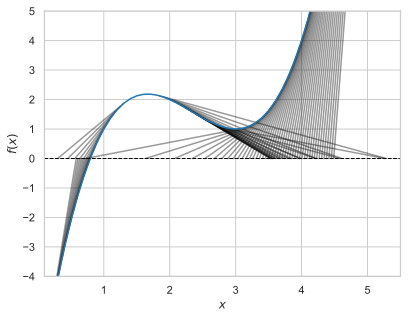

In [20]:
x_span = (0.1, 5.5)
y_span = (-4, 5)

x_vals = np.arange(*x_span, .1)

# xz = x1
# xp = func_prime(xz)*x_vals - xz*func_prime(xz) + func(xz)
# xpf = lambda x : func_prime(xz)*x - xz*func_prime(xz) + func(xz)

for x0 in np.linspace(*x_span, 100):
    x1 = x0 - func(x0)/func_prime(x0)
    if x1 > x_span[0] and x1 < x_span[1]: plt.plot([x1, x0], [0, func(x0)], '-', color='black', alpha=.4)

plt.plot(x_vals, func(x_vals))
# plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

# plt.plot(x_vals, xp)
# plt.text(.05,xpf(.05)+10,r'tangent with',fontsize='large', color='tab:orange')
# plt.text(.3,xpf(.05), r'slope $f^\prime(x_1)$',fontsize='large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1, linestyle='dashed')

# plt.axvline(xz, color='grey', linestyle='dashed')
# plt.text(xz+.1,5,r'$x_1$',fontsize='large',color='grey')

# x1=(xz*func_prime(xz)-func(xz))/func_prime(xz)
# plt.axvline(x1,color='grey',linestyle='dashed')
# plt.text(x1-.4,12,r'$x_2$',fontsize='large',color='grey')

plt.ylim(*y_span)
plt.xlim(*x_span)

# plt.title(r'i=2'+f' for Newton\'s method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.savefig("../../images/root-splash.png", dpi=330)

## Secant Method

In [21]:
def secant(a_func, x_arr, tol=1e-9, max_iter=1e4, noisy=False):
    """This function uses the secant method to approximate a root/zero of a function.
    
    Input: function, initial guesses x0, x1, optional absolute error tolerance, and maximum number of iterations"""
    max_iter = int(max_iter)
    x_0, x_1 = x_arr
    x_pprev = x_0
    x_prev = x_1
    counter = 0
    
    for i in range(max_iter):
        numerator = a_func(x_prev) * (x_prev - x_pprev)
        denominator = a_func(x_prev) - a_func(x_pprev)
        assert denominator != 0, "Division by zero encountered in computation in secant method"
        
        x_cur = x_prev - (numerator/denominator)
        
        # checking tolerance
        if abs(x_cur - x_prev) < tol or abs(x_cur) < tol:
            if noisy:
                return (x_cur, counter)
            return x_cur
        
        x_pprev = x_prev
        x_prev = x_cur
        
        counter += 1
    
    raise ValueError("No convergence")

In [22]:
secant(func, (1.5, 2.5))

0.7944305695994097

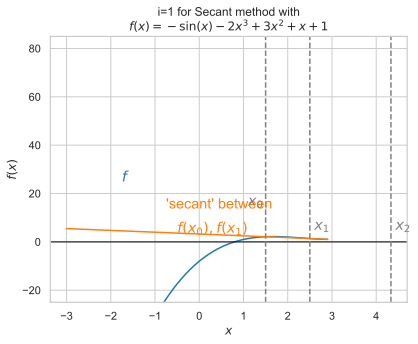

In [23]:
x_vals = np.arange(-3,3,.1)

#y=mx+c
xz0, xz1 = 1.5, 2.5
xp = (func(xz1) - func(xz0))/(xz1-xz0) * (x_vals - xz1) + func(xz1)
xpf = lambda x : (func(xz1) - func(xz0))/(xz1-xz0) * (x - xz1) + func(xz1)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
linex = -.75
plt.text(linex,xpf(linex)+10,r"'secant' between",fontsize='large', color='tab:orange')
plt.text(linex+.25,xpf(linex), r'$f(x_0),f(x_1)$',fontsize='large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz0, color='grey', linestyle='dashed')
plt.text(xz0-.4,15,r'$x_0$',fontsize='large',color='grey')

plt.axvline(xz1, color='grey', linestyle='dashed')
plt.text(xz1+.1,5,r'$x_1$',fontsize='large',color='grey')

xzn = xz1 - func(xz1)*((xz1-xz0)/(func(xz1)-func(xz0)))
plt.axvline(xzn,color='grey',linestyle='dashed')
plt.text(xzn+.1,5,r'$x_2$',fontsize='large',color='grey')

plt.ylim(-25, 85)

plt.title(r'i=1'+f' for Secant method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

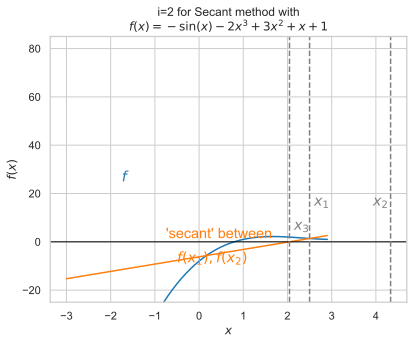

In [24]:
x_vals = np.arange(-3,3,.1)

#y=mx+c
xz0, xz1 = xz1, xzn
xp = (func(xz1) - func(xz0))/(xz1-xz0) * (x_vals - xz1) + func(xz1)
xpf = lambda x : (func(xz1) - func(xz0))/(xz1-xz0) * (x - xz1) + func(xz1)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
linex = -.75
plt.text(linex,xpf(linex)+10,r"'secant' between",fontsize='large', color='tab:orange')
plt.text(linex+.25,xpf(linex), r'$f(x_1),f(x_2)$',fontsize='large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz0, color='grey', linestyle='dashed')
plt.text(xz0+.1,15,r'$x_1$',fontsize='large',color='grey')

plt.axvline(xz1, color='grey', linestyle='dashed')
plt.text(xz1-.4,15,r'$x_2$',fontsize='large',color='grey')

xzn = xz1 - func(xz1)*((xz1-xz0)/(func(xz1)-func(xz0)))
plt.axvline(xzn,color='grey',linestyle='dashed')
plt.text(xzn+.1,5,r'$x_3$',fontsize='large',color='grey')

plt.ylim(-25, 85)

plt.title(r'i=2'+f' for Secant method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

## Steffenson

In [25]:
def steffensen(a_func, x_0, tol=1e-9, max_iter=1e4, noisy=False):
    max_iter = int(max_iter)
    counter = 0
    g_func = lambda x : a_func(x + a_func(x))/a_func(x) - 1
    x_prev = x_0
    
    for i in range(max_iter):
        x_cur = x_prev - (a_func(x_prev)/g_func(x_prev))
        
        # check tolerance
        if abs(x_cur - x_prev) < tol or abs(x_cur) < tol:
            if noisy:
                return (x_cur, counter)
            return x_cur
        
        x_prev = x_cur
        counter += 1
    
    raise ValueError("No convergence")

In [26]:
steffensen(func, 2.2, noisy=True)

(0.7944305695994099, 7)

1.7473971544501332


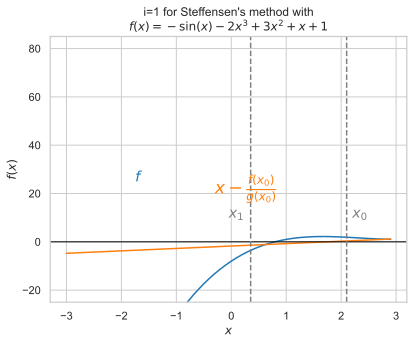

In [27]:
x_vals = np.arange(-3,3,.1)

xz = 2.1
gf = lambda x : func(x + func(x))/func(x) - 1
xp = x_vals - func(xz)/gf(xz)
print(func(xz)/gf(xz))
xpf = lambda x : x - func(x)/gf(x)


plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
plt.text(-.3,20,r'$x-\frac{f(x_0)}{g(x_0)}$',fontsize='x-large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz, color='grey', linestyle='dashed')
plt.text(xz+.1, 10, r'$x_0$', color='grey', fontsize='large')

plt.axvline(xpf(xz), color='grey', linestyle='dashed')
plt.text(xpf(xz)-.4, 10, r'$x_1$', color='grey', fontsize='large')

plt.ylim(-25, 85)

plt.title(r'i=1'+f' for Steffensen\'s method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

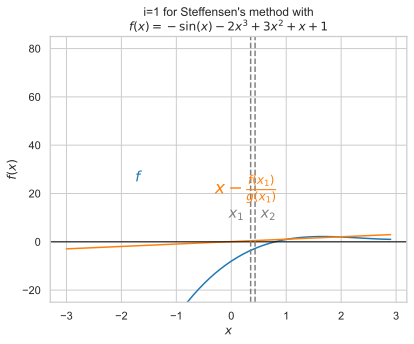

In [28]:
x_vals = np.arange(-3,3,.1)

xz = xpf(xz)
gf = lambda x : func(x + func(x))/func(x) - 1
xp = x_vals - func(xz)/gf(xz)
xpf = lambda x : x - func(x)/gf(x)

plt.plot(x_vals, func(x_vals))
plt.text(-1.75,25,r'$f$',color='tab:blue',fontsize='large')

plt.plot(x_vals, xp)
plt.text(-.3,20,r'$x-\frac{f(x_1)}{g(x_1)}$',fontsize='x-large', color='tab:orange')
 
plt.axhline(0, color='black', linewidth=1)

plt.axvline(xz, color='grey', linestyle='dashed')
plt.text(xz-.4, 10, r'$x_1$', color='grey', fontsize='large')

plt.axvline(xpf(xz), color='grey', linestyle='dashed')
plt.text(xpf(xz)+.1, 10, r'$x_2$', color='grey', fontsize='large')

plt.ylim(-25, 85)

plt.title(r'i=1'+f' for Steffensen\'s method with\n'+r'$f(x)=-\sin (x) - 2x^3 + 3x^2 + x + 1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

# 2. Comparisons

$$
f_1=\sin(x)-e^{-x}+5x^{3}-x^2;\space\space f_1^\prime=x(15x-2)+e^{-x}+\cos(x) \\
f_2=x^3 + \frac{1}{1+2x^2} - x;\space\space f_2^\prime = 3x^2 - \frac{4x}{(1+2x^2)^2} - 1 \\
f_3 = 5x^4 - 4x^2 + 2x - 3; \space\space f_3^\prime = 20x^3 - 8x + 2
$$

In [29]:
f1 = lambda x : np.sin(x) - np.e**(-x) + 5*(x**3) - x**2
f1d = lambda x : x*(15*x - 2) + np.e**(-x) + np.cos(x)

f2 = lambda x : x**3 + 1/(1+2*(x**2)) - x
f2d = lambda x : 3*(x**2) - (4*x)/((1+2*(x**2))**2) - 1

f3 = lambda x : 5*(x**4) - 4*(x**2) + 2*x - 3
f3d = lambda x : 20*(x**3) - 8*x + 2

In [30]:
f_total = ((f1, f1d, "f_1", (0,.5)), 
           (f2, f2d, "f_2", (-1.25, -1)),
           (f3, f3d, "f_3", (.5, 1.5)))

f_latex = [(r"\sin(x)-e^{-x}+5x^{3}-x^2", "f_1^\prime=x(15x-2)+e^{-x}+\cos(x)"),
          (r"x^3 + \frac{1}{1+2x^2} - x", "f_2^\prime = 3x^2 - \frac{4x}{(1+2x^2)^2} - 1"),
          (r"5x^4 - 4x^2 + 2x - 3", "f_3^\prime = 20x^3 - 8x + 2")]

In [31]:
bisection(f3,(.5,1.5),verbose=True)

1.0


1.0

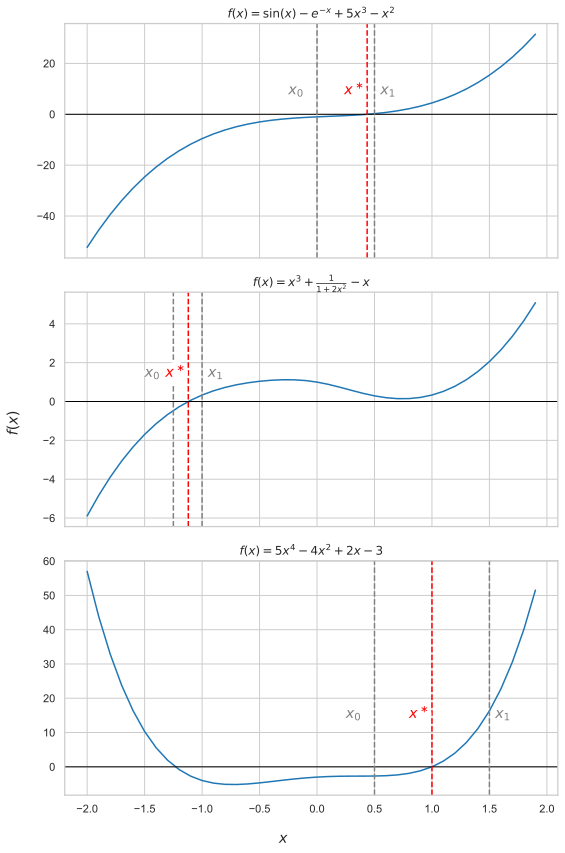

In [32]:
x_vals = np.arange(-2,2,.1)
fig, axs = plt.subplots(len(f_total), 1, sharex=True)
fig.set_size_inches(8, 12)

for f_no, f in enumerate(f_total):
    ax = axs[f_no]
    yvals = f[0](x_vals)
    
    ax.plot(x_vals, yvals)
    ax.set_title(rf'$f(x)={f_latex[f_no][0]}$')
    ax.axhline(0, color="black", linewidth=1)
    
    ax.axvline(f[3][0], color='grey', linestyle='dashed')
    ax.text(f[3][0]-.25, .25*np.max(yvals), r'$x_0$', color='grey', fontsize='large',
           bbox=dict(boxstyle="circle", facecolor='white', alpha=1, pad=0))

    ax.axvline(f[3][1], color='grey', linestyle='dashed')
    ax.text(f[3][1]+.05, .25*np.max(yvals), r'$x_1$', color='grey', fontsize='large',
            bbox=dict(boxstyle="circle", facecolor='white', alpha=1, pad=0))
    
    true_root = fsolve(f[0], f[3][0])[0]
    ax.axvline(true_root, color='red', linestyle='dashed')
    ax.text(true_root-.2, .25*np.max(yvals), r'$x^\ast$', color='red', fontsize='large',
           bbox=dict(boxstyle="circle", facecolor='white', alpha=1, pad=0))
    
    
fig.supylabel(r'$f(x)$')
fig.supxlabel(r'$x$')
fig.tight_layout()
plt.show()

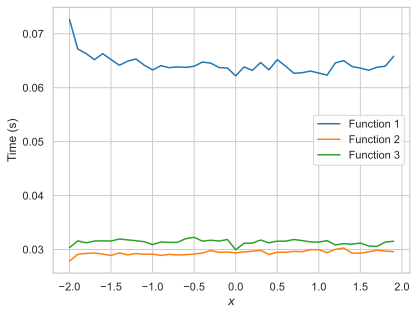

In [33]:
x_vals = np.arange(-2,2,.1)
for f_no, f in enumerate([f1, f2, f3]):
    plt.plot(x_vals, [timeit.timeit(lambda: f(val), number=100_000) for val in x_vals], label=f"Function {f_no+1}")
plt.ylabel("Time (s)")
plt.xlabel(r"$x$")
plt.legend()
plt.show()

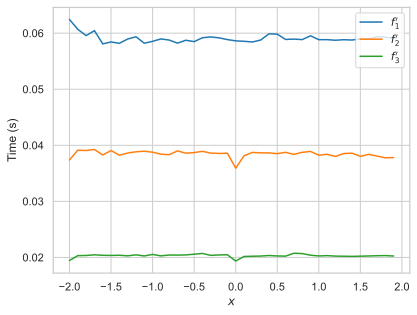

In [34]:
x_vals = np.arange(-2,2,.1)
for f_no, f in enumerate([f1d, f2d, f3d]):
    plt.plot(x_vals, [timeit.timeit(lambda: f(val), number=100_000) for val in x_vals], label=rf"$f_{f_no+1}^\prime$")
plt.ylabel("Time (s)")
plt.xlabel(r"$x$")
plt.legend()
plt.show()

In [35]:
methods = [bisection, newton, secant, steffensen]
method_labels = [f'{m} Method' for m in ["Bisection", "Newton's", "Secant", "Steffensen's"]]
method_res = [[[] for _ in range(len(methods))] for _ in f_total] # store result as (x, steps, time)

for f_no, f in enumerate(f_total):
    f, fp, f_lab, guess = f
    
    print(f"FUNCTION {f_no+1}")
    print("".join([i.ljust(25) for i in ['Method', 'Time', 'Iterations', 'Result']]))
    print("-"*95)
    for m, method in enumerate(methods):
        cur_time = timeit.Timer()

        try:
            if m in (0, 2): # bisection/secant need x0,x1
                x, steps = method(f, guess, noisy=True)
            elif m == 1: # newton needs f'
                x, steps = method((f, fp), guess[0], noisy=True)
            else:
                x, steps = method(f, guess[0], noisy=True)
            end_time = cur_time.timeit()
        except Exception:
            x, steps, end_time = guess[0], float('inf'), None
        
        end_time = np.round(end_time, 4) if end_time is not None else end_time
        x = np.round(x, 4) if x is not None else x
        print("".join(i.ljust(25) for i in list(map(str,[method_labels[m], end_time, steps+1, x]))))
    print()

FUNCTION 1
Method                   Time                     Iterations               Result                   
-----------------------------------------------------------------------------------------------
Bisection Method         0.0045                   29                       0.436                    
Newton's Method          0.0046                   6                        0.436                    
Secant Method            0.0046                   6                        0.436                    
Steffensen's Method      0.0044                   9                        0.436                    

FUNCTION 2
Method                   Time                     Iterations               Result                   
-----------------------------------------------------------------------------------------------
Bisection Method         0.0052                   27                       -1.12                    
Newton's Method          0.0045                   5                        -1.

In [44]:
methods = [bisection, newton, secant, steffensen]
method_labels = [f'{m} Method' for m in ["Bisection", "Newton's", "Secant", "Steffensen's"]]
iterations = 1000
method_res = [[[] for _ in range(len(methods))] for _ in f_total] # store result as [func][method][(x, steps, time)]

for f_no, f_arr in enumerate(f_total):
    f, fp, f_lab, guess = f_arr

    for m, method in enumerate(methods):
        for _ in range(iterations):
            try:
                cur_time = timeit.Timer()
                if m in (0, 2):
                    x, steps = method(f, guess, noisy=True)
                elif m == 1:
                    x, steps = method((f, fp), guess[0], noisy=True)
                else:
                    x, steps = method(f, guess[0], noisy=True)
                end_time = cur_time.timeit()
                
            except ValueError:
                x, steps, end_time = None, None, None
            
            method_res[f_no][m].append((x, steps, end_time))

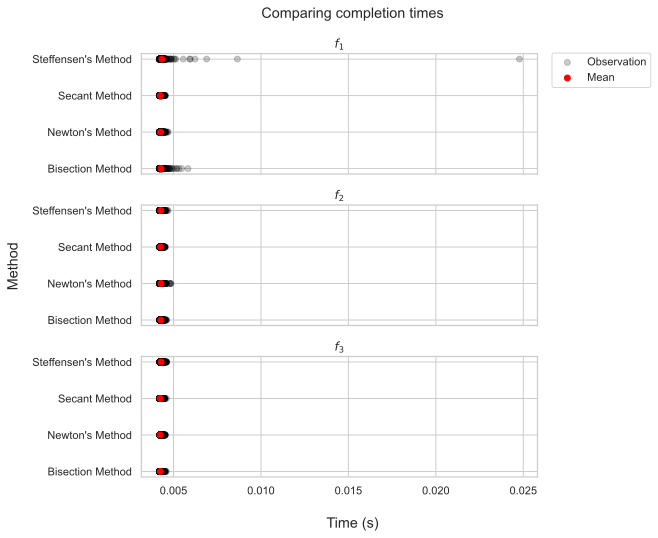

In [37]:
# fig, axs = plt.subplots(len(f_total)//2, 2)
fig, axs = plt.subplots(len(f_total), 1, sharex=True)
w,h = 10,7.5
fig.set_size_inches(w,h)
iterations = 1000

for f_no in range(len(f_total)):
#     curax = axs[f_no//2, 1-f_no%2] if len(f_total) > 2 else axs[f_no]
    curax=axs[f_no]
    
    curax.scatter([[j[2] for j in method_res[f_no][i]] for i in range(4)],
                [[i]*iterations for i in range(4)],
               color='black',
               alpha=.2,
               label="Observation")
    curax.scatter([np.mean(np.array([j[2] for j in method_res[f_no][i]],dtype=float)) for i in range(4)], range(4), color='red', label="Mean")
    curax.set_yticks(range(4), [method_labels[i] for i in range(4)])
    curax.set_title(r'${}$'.format(f_total[f_no][2]))

fig.supxlabel("Time (s)")
fig.supylabel("Method")
fig.suptitle(f"Comparing completion times")
axs[0].legend(bbox_to_anchor=(1.3,1.05))
fig.tight_layout()

In [38]:
# f2, secant vs newton
np.median([j[2] for j in method_res[1][2]]), np.median([j[2] for j in method_res[1][1]])

(0.004257186999893747, 0.004273291500794585)

In [39]:
# f2, is secant faster than newton?
np.median([j[2] for j in method_res[1][2]]) - np.median([j[2] for j in method_res[1][1]])

-1.6104500900837593e-05

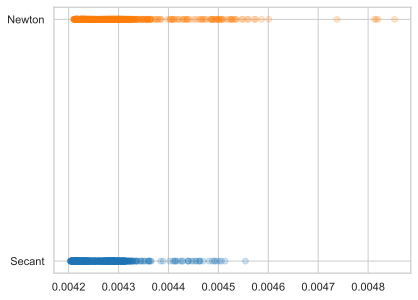

In [40]:
# f2, secant vs newton
plt.scatter(([j[2] for j in method_res[1][2]]),["Secant"] * iterations,alpha=.2)
plt.scatter(([j[2] for j in method_res[1][1]]),["Newton"] * iterations,alpha=.2)
plt.show()

In [41]:
fsolve(f3,.5)

array([1.])

In [42]:
# why does steffensen choose other root for f3? -> because derivative >> 0
f1d(fsolve(f1,0)[0])

3.532470154854138

/var/folders/fq/1bzypjd11gd51q1zwytmq_6r0000gn/T/ipykernel_2477/3490062382.py:12: RuntimeWarning: Mean of empty slice
  curax.scatter([np.nanmean(f1_true-np.array([j[0] for j in method_res[f_no][i]],dtype=float)) for i in range(4)],


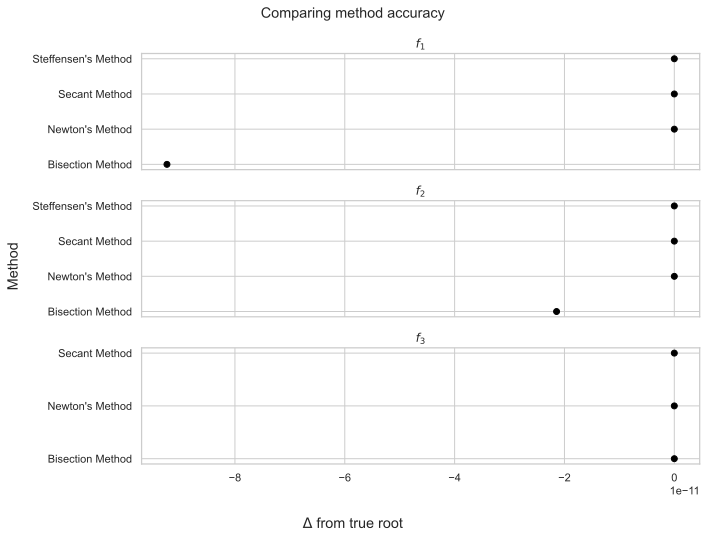

In [45]:
method_res[2][3] = []

fig, axs = plt.subplots(len(f_total), 1, sharex=True)
w,h = 10,7.5
fig.set_size_inches(w,h)

for f_no in range(len(f_total)):
    f1_true = fsolve(f_total[f_no][0], f_total[f_no][3][0])[0]
    
    curax = axs[f_no]
    
    curax.scatter([np.nanmean(f1_true-np.array([j[0] for j in method_res[f_no][i]],dtype=float)) for i in range(4)],
            [method_labels[i] for i in range(4)],
           color='black')
    curax.set_title(r'${}$'.format(f_total[f_no][2]))

fig.supxlabel(r'$\Delta$'+" from true root")
fig.supylabel("Method")
fig.suptitle(f"Comparing method accuracy")
fig.tight_layout()

/var/folders/fq/1bzypjd11gd51q1zwytmq_6r0000gn/T/ipykernel_2477/2267094591.py:9: RuntimeWarning: Mean of empty slice
  [np.nanmean(np.array([j[1]+1 for j in method_res[f_no][i]],dtype=float)) for i in range(4)])


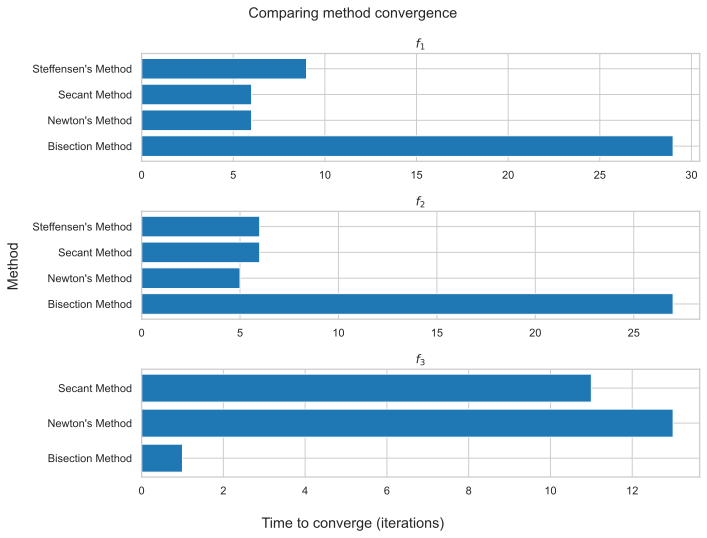

In [46]:
fig, axs = plt.subplots(len(f_total), 1)
w,h = 10,7.5
fig.set_size_inches(w,h)

for f_no in range(len(f_total)):
    curax = axs[f_no]
    
    curax.barh([method_labels[i] for i in range(4)],
         [np.nanmean(np.array([j[1]+1 for j in method_res[f_no][i]],dtype=float)) for i in range(4)])
    curax.set_title(r'${}$'.format(f_total[f_no][2]))

fig.supxlabel("Time to converge (iterations)")
fig.supylabel("Method")

fig.suptitle(f"Comparing method convergence")
fig.tight_layout()

# 3. Evaluation

**Bisection**
 * Pros: Intuitive, simple
 * Cons: Slow convergence, bad accuracy, requires two inputs
 
**Newton's**
 * Pros: Fast convergence, accurate, intuitive
 * Cons: Need first derivative of function
 
**Secant**
 * Pros: Fast convergence, accurate
 * Cons: Needs two inputs
 
**Steffensen's**
 * Pros: Fast convergence